# Mulitple Linear Regression¶
# Problem Statement

A US bike-sharing company BoomBikes has constantly began to dips its revenue due to pandemic crisis , the company however wants to be sustain in current scenario of markets downtrends , has decided to come up with revival plan able to increase its revenue restoration with understanding the factors and scenarios of their products.

Identify variables that are significance to the demand their bikes. Provide optimal solution by performing prescriptive analysis which lead to bike demands.



In [537]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [538]:
# Load the dataset 
df_bike_day= pd.read_csv('day.csv')

In [539]:
# Check top 5 rows of  dataset
df_bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [540]:
# check the shape of dataframe
df_bike_day.shape

(730, 16)

Applying the descriptive statistics summary of the dataframe to chekc the possible missing values and understand the dataset more elaborately for further analysis


In [541]:
# data description
df_bike_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [542]:
# get the info about columns

df_bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [543]:
# checking for if any null values in dataset

df_bike_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [544]:
# Mapping columns with better naming convention for easier understanding 
df_bike_day.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [545]:
# Now lets verify the dataset on changes made
df_bike_day.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [546]:
# lets create a copy of the dataframe to check any duplicate values present in the dataset
df_bike_day_copy = df_bike_day.copy()

In [547]:
# checking the shape of new dataframe

df_bike_day_copy.shape

(730, 16)

In [548]:
# check if any duplicates  in the dataset
df_bike_day_copy.drop_duplicates(inplace=True)

In [549]:
# now check the dataframe again
df_bike_day_copy.shape

(730, 16)

In [550]:
# Lets apply different data cleaning and mapping techniques 
# Step-1 Lets drop the unwanted columns
# Step -2 The instant columns is index value for row, dteday has date can be compensated with year and month column,
# Step-3 The casual and registered colums seems to be the consolidated to category for cnt column.

df_bike_day.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [551]:
# Mapping the season column with different seasonal names

df_bike_day.season = df_bike_day.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [552]:
# Mapping the month column with month names

df_bike_day.month = df_bike_day.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [553]:
# Mapping the weekday column with weekday names

df_bike_day.weekday = df_bike_day.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [554]:
# Mapping the weathersit column with types of weather instance name

df_bike_day.weathersit = df_bike_day.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [555]:
# check the head of the dataset

df_bike_day.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [556]:
# Now check the information the columns names

df_bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


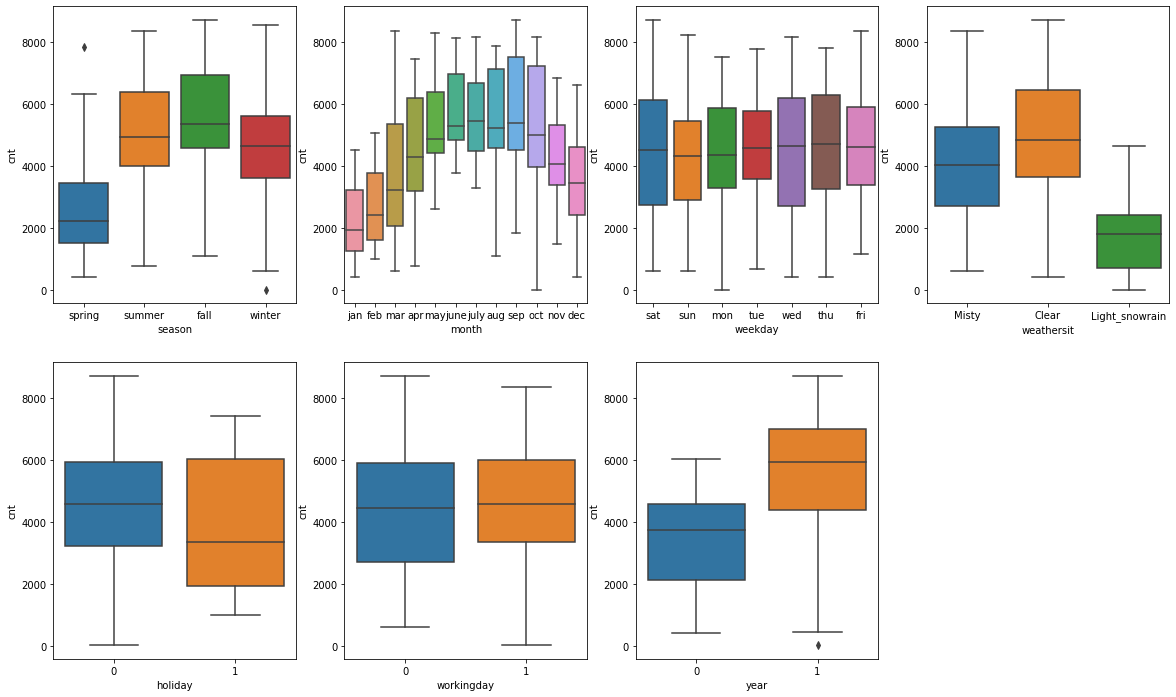

In [557]:
# Now lets Visualize the dataset and draw different insights of data
# First lets analyze and visualize the categorical columns and check our predictor variables against target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike_day)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df_bike_day)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike_day)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike_day)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike_day)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike_day)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df_bike_day)
plt.show()

In [558]:
# Now lets create function for barplot to check with categorical variable in dataset against the target variables 

def cat_plot_col(col):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=df_bike_day)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=df_bike_day, hue='year',palette='Set2')
    plt.legend(labels=['2018', '2019'])
    plt.show()

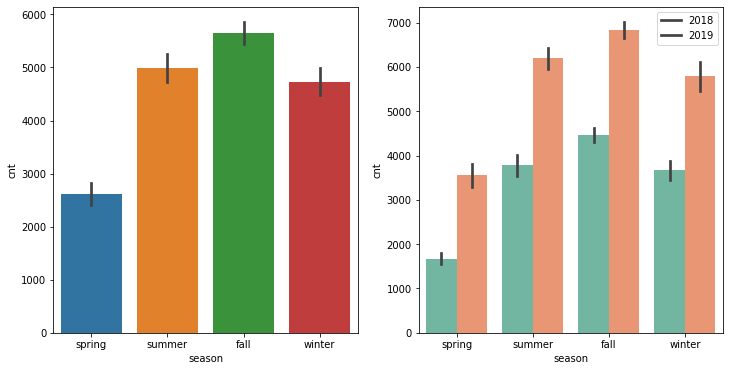

In [559]:
# First let plot against season variable
cat_plot_col('season')

Demand of the bike sharing is happenin the fall month and its has upwards trend from 2018 to 2019

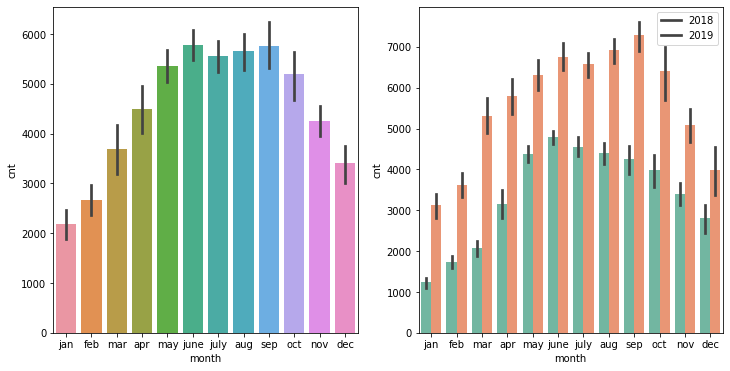

In [560]:
# Let plot on month variables

cat_plot_col('month')

The plot cleary shows that demand is in month from may and goes till oct and downtrends till end of year , this has good uptrends in 2018 to 2019.

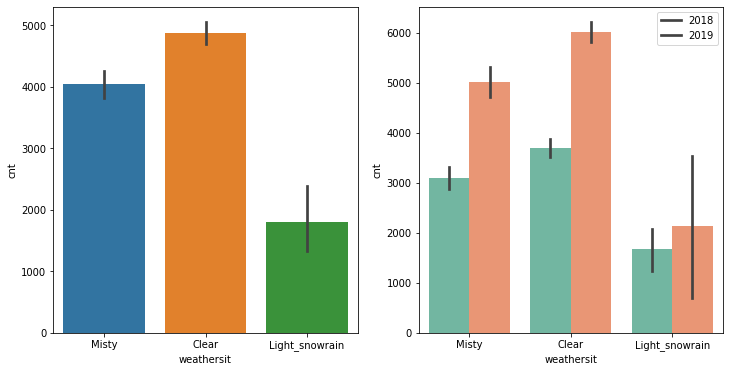

In [561]:
# let plot against the weathersit column

cat_plot_col('weathersit')

It cleary shows that Clear weathersit has demand bike ride followed by Misty weather , and good sign of uptrend in 2018 to 2019.

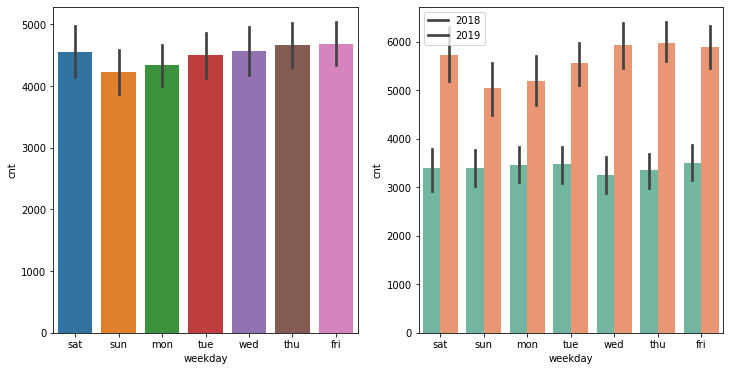

In [562]:
# plot against the weekday column

cat_plot_col('weekday')

Sun and Mon is has less demand compare to the rest of week , sat seems to be highest demand due to people moving around more on weekends like fri and sat

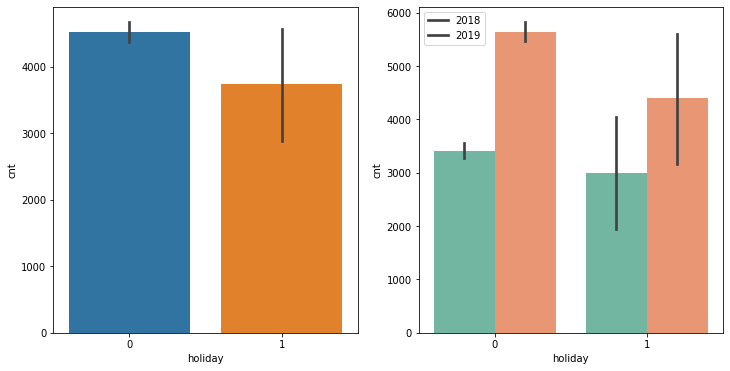

In [563]:
# Now lets check with the holiday column

cat_plot_col('holiday')

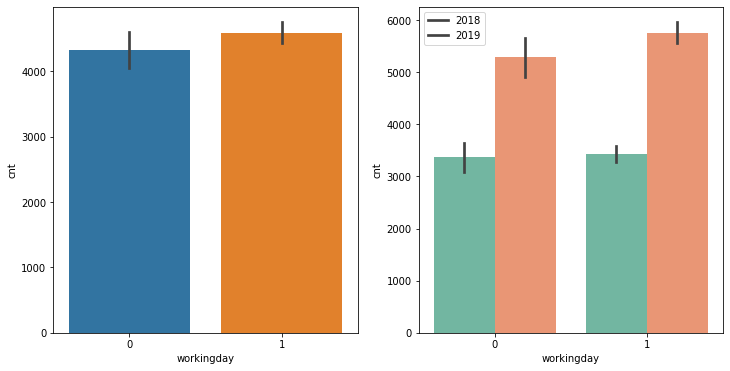

In [564]:
# Lets plot against the working day

cat_plot_col('workingday')

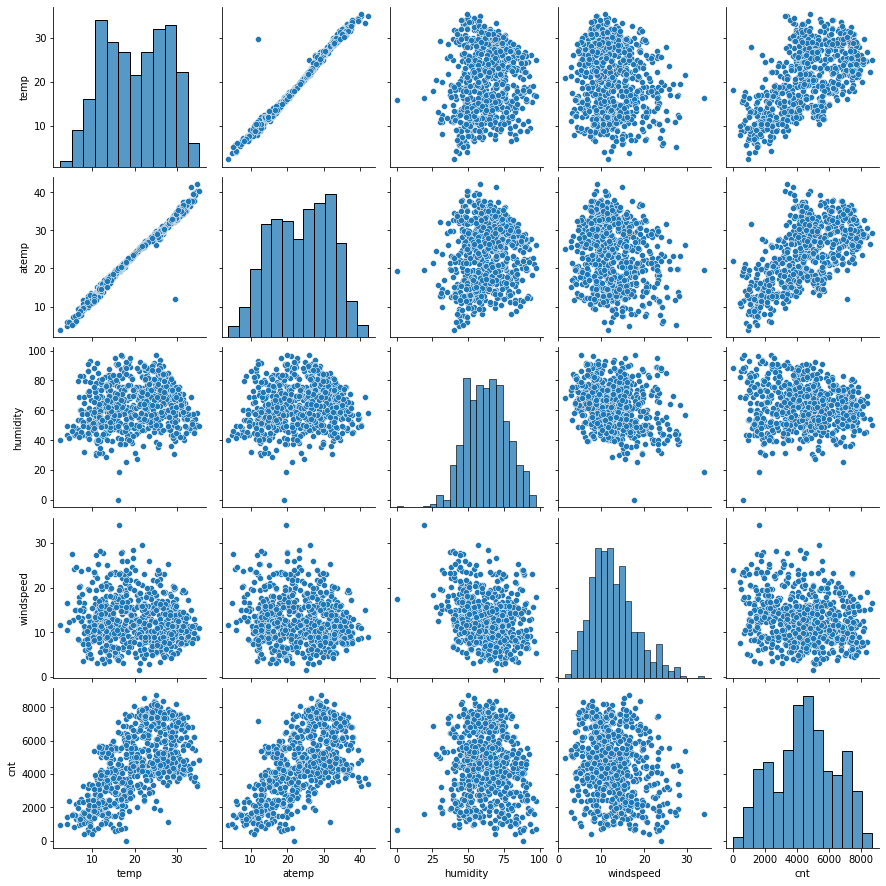

In [565]:
# Now lets analyse the numeric columns using pairplot for better understanding

sns.pairplot(data=df_bike_day,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

The pair plot clearly states that temp and atemp has high sign of correlation.

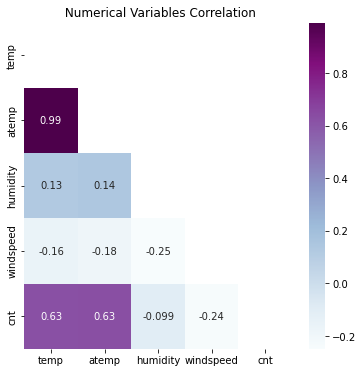

In [566]:
# Check the correlation of numeric values using heatmap

plt.figure(figsize = (6,6))
data_mask = np.triu(df_bike_day[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df_bike_day[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="BuPu", mask=data_mask)
plt.title(" Numerical Variables Correlation")
plt.show()

Above figure shows that atemp and temp has pretty strong correlation

In [567]:
# Lets go ahead and create dumy variable for month , weekday season and weathersit variables.
df_months=pd.get_dummies(df_bike_day.month,drop_first=True)
df_weekday=pd.get_dummies(df_bike_day.weekday,drop_first=True)
df_weathersit=pd.get_dummies(df_bike_day.weathersit,drop_first=True)
df_season=pd.get_dummies(df_bike_day.season,drop_first=True)

In [568]:
df_bike_day.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [569]:
# lets go ahead and create new dataframe concatenting the all the dummy dataframes 

df_bike_day_new= pd.concat([df_bike_day,df_months,df_weekday,df_weathersit,df_season],axis=1)

In [570]:
df_bike_day_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [571]:
df_bike_day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [572]:
# Since we have created the dummy variables now its time to drop the unneccessary columns 
df_bike_day_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [573]:
# Now check the dataframe for validation with new dummy variables
df_bike_day_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [574]:
# Lets check the shape of dataframe
df_bike_day_new.shape

(730, 30)

In [575]:
# Now check the information of columns in the dataset
df_bike_day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

# Model Build and Training

Split Train and Test set 

In [576]:
# Now split the dataset into train and test set
np.random.seed(0)
df_train, df_test = train_test_split(df_bike_day_new, train_size = 0.7, random_state = 100)

In [577]:
# check the shape of train dataset
df_train.shape

(510, 30)

In [578]:
# ALso check the shape of  test dataset
df_test.shape

(220, 30)

In [579]:
# Now lets the scale the features using MinMaxScaler 
scaler = MinMaxScaler()

In [580]:
# Let check the  train datset once before scaling it .
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [581]:
#Now lets scale the columns using scaler() function other than category and dummy variables
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [582]:
# Check the train set after scaling the features
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [583]:
# Check the statistical inference of the train dataset
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


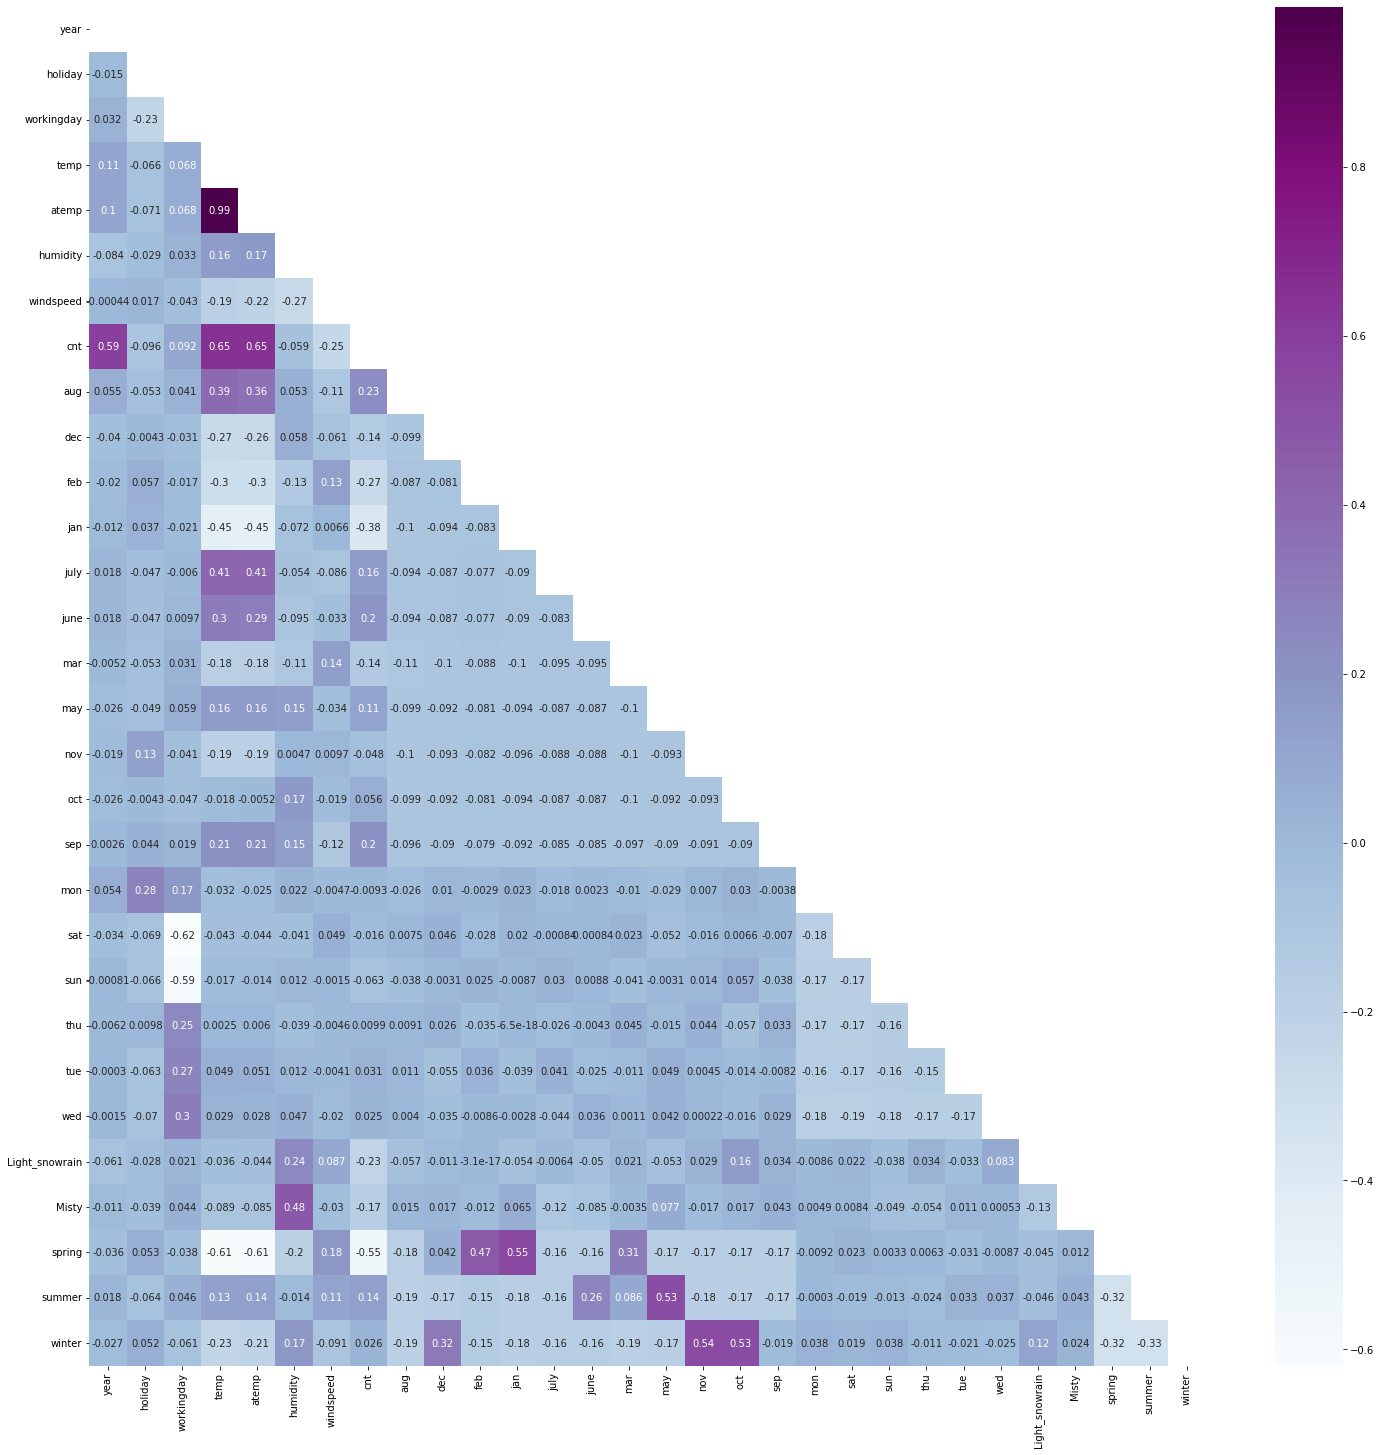

In [584]:
# Lets check the highly correlated variables against correlated coefficients 
plt.figure(figsize = (25,25))
df_mask1 = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="BuPu", mask=df_mask1)
plt.show()

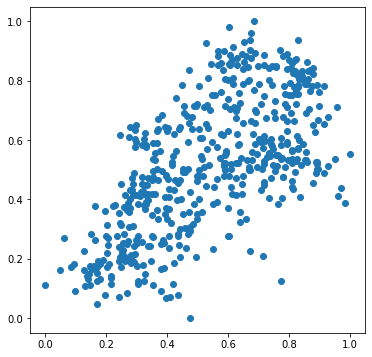

In [585]:
# Check the correlation using scatter plot for trends
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [586]:
# Lets go ahead and build the model 
y_train_set = df_train.pop('cnt')
X_train_set = df_train

In [587]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train_set, y_train_set)

rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)
rfe = rfe.fit(X_train_set, y_train_set)

In [588]:
#List of variables selected in top 15 list

list(zip(X_train_set.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', False, 3),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 14),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [589]:
# selecting the selected variable via RFE in col list

col = X_train_set.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'summer', 'winter'],
      dtype='object')


In [590]:
# checking which columns has been rejected

X_train_set.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [591]:
# Generic function to calculate VIF of variables

def calculateVIF(df_vif):
    vif = pd.DataFrame()
    vif['Features'] = df_vif.columns
    vif['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [592]:
# dataframe with RFE selected variables
X_train_rfe = X_train_set[col]

In [593]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.68
8,sat,12.20
9,sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,humidity,1.91
11,Misty,1.57


In [594]:
# Building 1st linear regression model
X_train_lm_One = sm.add_constant(X_train_rfe)
lr_One = sm.OLS(y_train_set,X_train_lm_One).fit()
print(lr_One.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          2.11e-191
Time:                        15:03:18   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1995      0.028      7.

In [595]:
# As workingday shows high VIF values hence we can drop it
X_train_Vif = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_Vif)

,Features,VIF
3,humidity,28.25
2,temp,16.06
4,windspeed,4.68
11,spring,4.03
13,winter,3.36
12,summer,2.79
10,Misty,2.30
0,year,2.08
5,july,1.59
6,sep,1.39


In [596]:
# Building 2nd linear regression model
X_train_lm_Two = sm.add_constant(X_train_Vif)
lr_Two = sm.OLS(y_train_set,X_train_lm_Two).fit()
print(lr_Two.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          2.11e-191
Time:                        15:03:27   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2832      0.034      8.

In [597]:
# We can drop humidity variable as it has high VIF value
X_train_Vif = X_train_Vif.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_Vif)

,Features,VIF
2,temp,5.18
3,windspeed,4.63
11,summer,2.24
10,spring,2.13
0,year,2.07
12,winter,1.84
4,july,1.59
9,Misty,1.56
5,sep,1.34
6,sat,1.23


In [598]:
# Building 3rd linear regression model
X_train_lm_Three = sm.add_constant(X_train_Vif)
lr_Three = sm.OLS(y_train_set,X_train_lm_Three).fit()
print(lr_Three.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.28e-188
Time:                        15:03:55   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2037      0.029      6.

In [599]:
# We can drop sat variable as it has high p-value
X_train_Vif = X_train_Vif.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_Vif)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
10,summer,2.24
9,spring,2.11
0,year,2.07
11,winter,1.81
4,july,1.59
8,Misty,1.56
5,sep,1.34
6,sun,1.18


In [600]:
# Building 4th linear regression model

X_train_lm_Four = sm.add_constant(X_train_Vif)
lr_Four = sm.OLS(y_train_set,X_train_lm_Four).fit()
print(lr_Four.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.45e-189
Time:                        15:04:12   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2060      0.029      7.

In [601]:
# We can drop jul variable as it has p-value
X_train_Vif = X_train_Vif.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_Vif)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,year,2.07
8,spring,2.02
9,summer,1.91
10,winter,1.66
7,Misty,1.55
4,sep,1.23
5,sun,1.18
6,Light_snowrain,1.08


In [602]:
# Building 5th linear regression model

X_train_lm_Five = sm.add_constant(X_train_Vif)
lr_Five = sm.OLS(y_train_set,X_train_lm_Five).fit()
print(lr_Five.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          3.23e-189
Time:                        15:04:24   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1981      0.029      6.

Now we conside that the above model i.e lr_Five predictors values seems to be significant since it have very low multicolinearuty between the predictor and p_values.
Since F-Satistics value of 235.2( > 1) and p-value of 3.23e-189 i.e almost equals to zero , states over model is significant. 

In [603]:
# Checking the parameters and their coefficient values
lr_Five.params

const             0.198086
year              0.234000
holiday          -0.104300
temp              0.478161
windspeed        -0.148022
sep               0.089359
sun              -0.049479
Light_snowrain   -0.290403
Misty            -0.080899
spring           -0.054372
summer            0.062284
winter            0.096907
dtype: float64

Train and Validation data for Residual analysis

In [604]:
#Residual Analysis of the train data and validation
X_train_lm_Five

,const,year,holiday,temp,windspeed,sep,sun,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,1,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,0,1,0,1,0


In [605]:
y_train_pred = lr_Five.predict(X_train_lm_Five)

Checking the normality of Error terms

Text(0.5, 0, 'Errors')

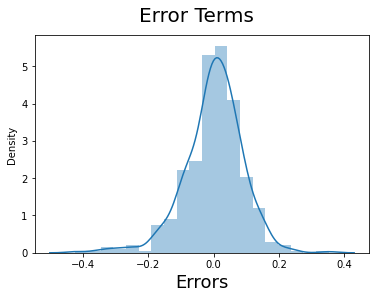

In [606]:
# Plotting histogram for error terms
fig = plt.figure()
sns.distplot((y_train_set - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are normal distributed

Final check of Multi Colinearity 

In [607]:
calculateVIF(X_train_Vif)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,year,2.07
8,spring,2.02
9,summer,1.91
10,winter,1.66
7,Misty,1.55
4,sep,1.23
5,sun,1.18
6,Light_snowrain,1.08


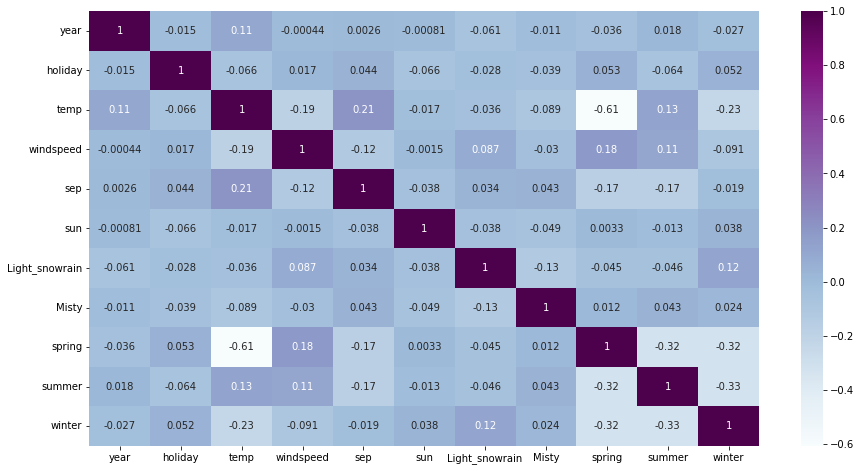

In [608]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_Vif.corr(),annot = True, cmap="BuPu")
plt.show()

VIF values < 5 is good  sign since there would be no multicolinearity as seen from the heatmap


Linearity Valition using Component and Component plus residual plot

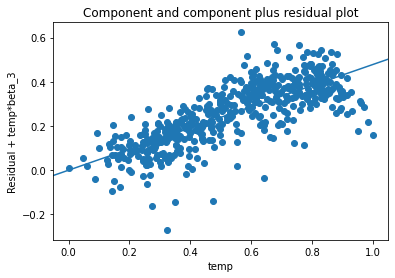

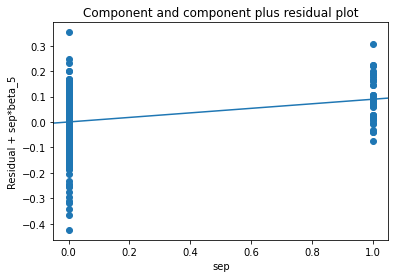

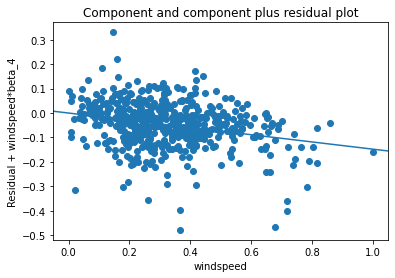

In [609]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_Five, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_Five, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_Five, 'windspeed')
plt.show()

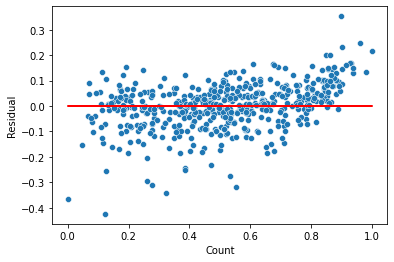

In [610]:
y_train_pred = lr_Five.predict(X_train_lm_Five)
residual = y_train_set - y_train_pred
sns.scatterplot(y_train_set,residual)
plt.plot(y_train_set,(y_train_set - y_train_set), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot of residuals.

Residual of Independence:

Final model lr_Five for Durbin-Watson is 2.102, which clearly states that there is no autocorrelation.

Predictions Using the Final Model
Since we fitted model and checked the normality of erroe terms , let s go ahead and make predictions base on our prescribed model i.e lr_Five

# Validation on Test data

In [611]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [612]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [613]:
y_test_set = df_test.pop('cnt')
X_test_set = df_test

In [614]:
col_Test = X_train_Vif.columns

X_test = X_test_set[col_Test]

# Adding constant variable to test dataframe
X_test_lm_Five = sm.add_constant(X_test)

In [615]:
y_pred = lr_Five.predict(X_test_lm_Five)

In [616]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8066

# Model Evaluation
Plot the graph with actual to predicted values

Text(0, 0.5, 'y_pred')

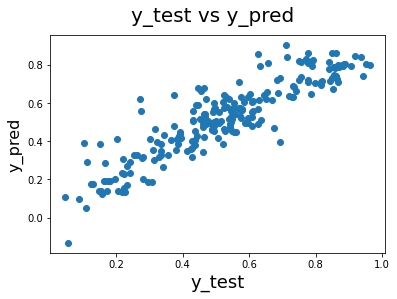

In [617]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [620]:
round(lr_Five.params,4)

const             0.1981
year              0.2340
holiday          -0.1043
temp              0.4782
windspeed        -0.1480
sep               0.0894
sun              -0.0495
Light_snowrain   -0.2904
Misty            -0.0809
spring           -0.0544
summer            0.0623
winter            0.0969
dtype: float64

In [621]:
#Let's Calculate the Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7963


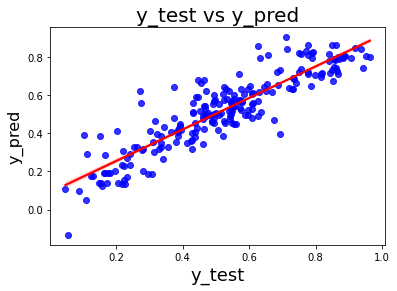

In [622]:
# Lets Visualize the fit on test data with regression plot 

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.839
- Test dataset R^2           : 0.8066
- Train dataset Adjusted R^2 : 0.835    
- Test dataset Adjusted R^2  : 0.7963

Demand of bikes depend on year, holiday, temp, windspeed, sep,sun, Light_snowrain, Misty, spring, summer and winter.